#**Yulu Bike Demand Analysis**

**Problem Statement:** Yulu, a leading micro-mobility service provider in India, has recently experienced a decline in revenue and wants to identify factors affecting the demand for its shared electric bikes. This project analyzes rental data to understand how variables such as working days, weather conditions, and seasonal patterns influence bike usage. Using Exploratory Data Analysis and statistical hypothesis testing, the study aims to derive insights that can help Yulu improve demand forecasting and operational planning.

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import ttest_ind
from scipy.stats import kruskal
from scipy.stats import chi2_contingency

In [ ]:
#Loading the dataset
data=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089')

#**Basic EDA**

**Question 1(a).** Examine dataset structure, characteristics, and statistical summary.

**Solution:**

In [ ]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
#Checking Shape of data
print(f'No of rows in dataset:{data.shape[0]}')
print(f'No of columns in dataset:{data.shape[1]}')

No of rows in dataset:10886
No of columns in dataset:12


In [ ]:
#columns in our dataset
data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
#Statistical description of data
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


**Question 1(b).** Identify missing values and perform Imputation using an appropriate method.

**Solution:**

In [ ]:
#Checking missing values
data.isna().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


**Question 1(c).** Identify and remove duplicate records.

**Solution:**

In [ ]:
#Checking duplicate rows in data
data[data.duplicated()]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


In [ ]:
#No. of unique values in each column
data.nunique()

,0
datetime,10886
season,4
holiday,2
workingday,2
weather,4
temp,49
atemp,60
humidity,89
windspeed,28
casual,309


In [ ]:
data.dtypes

,0
datetime,object
season,int64
holiday,int64
workingday,int64
weather,int64
temp,float64
atemp,float64
humidity,int64
windspeed,float64
casual,int64


## Observations from Basic EDA:

*   **Dataset Dimensions**: The dataset contains **10886 rows and 12 columns**.
*   **Missing Values**: There are no missing values in any of the columns.
*   **Duplicate Rows**: The dataset does not contain any duplicate rows.
*   **Data Types**:
    *   The 'datetime' column is currently of object type.
    *  Columns 'season', 'holiday', 'workingday', and 'weather' are integers, but likely represent categorical variables.
    *   'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', and 'count' are numerical columns.
*   **Unique Values**:
    *   Each entry in the 'datetime' column is unique, suggesting hourly granularity.
    *   'season', 'holiday', 'workingday', and 'weather' have very few unique values (4, 2, 2, and 4 respectively), confirming their categorical nature.
*   **Descriptive Statistics (Numerical Columns)**:
    *   The 'count' column (total rentals) shows a wide range from 1 to 977, with a mean of approximately 191.57 and a standard deviation of 181.14, indicating significant variability in hourly bike rentals.
    *   'casual' and 'registered' users also exhibit considerable spread.


#Univariate Analysis of numerical and categorical columns

**Question 1(d).** Analyze the distribution of Numerical & Categorical variables, separately

**Solution:**

##Categorical columns

Categorical columns:'season', 'holiday', 'workingday', and 'weather'

In [ ]:
cat_col=['season','holiday','workingday','weather']
for col in cat_col:
  print(f'Value Counts of {col}')
  display(data[col].value_counts())

Value Counts of season


,count
season,
4,2734
2,2733
3,2733
1,2686


Value Counts of holiday


,count
holiday,
0,10575
1,311


Value Counts of workingday


,count
workingday,
1,7412
0,3474


Value Counts of weather


,count
weather,
1,7192
2,2834
3,859
4,1


------------------------------Countplots of categorical variables----------------------------------


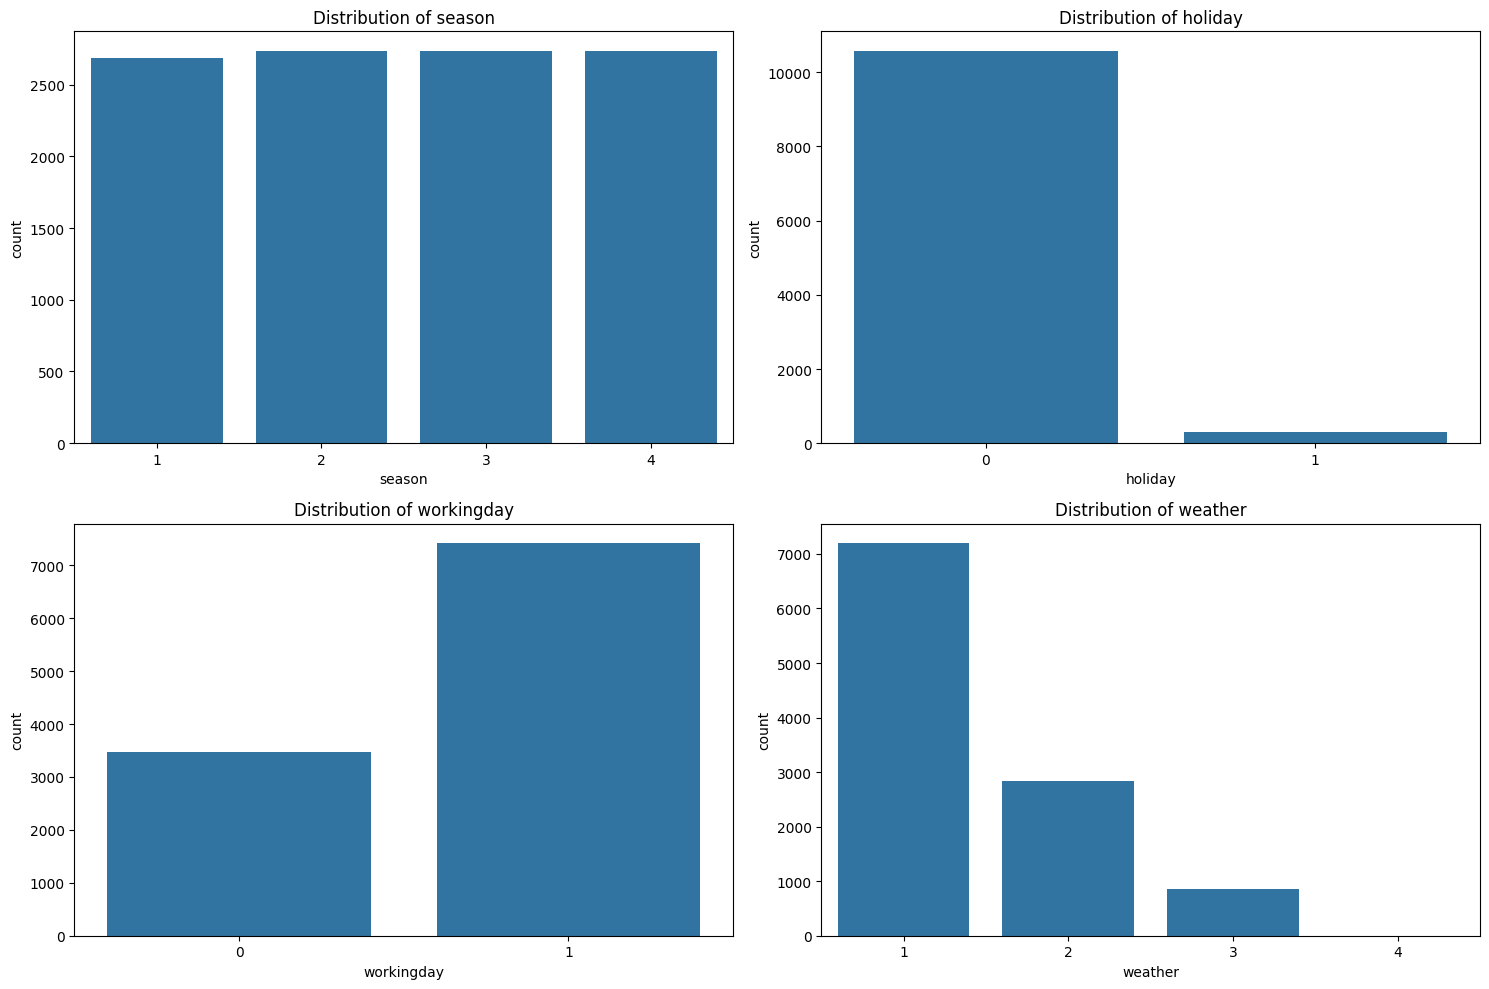

In [ ]:
print('------------------------------Countplots of categorical variables----------------------------------')
i=0
plt.figure(figsize=(15,10))
for col in cat_col:
  plt.subplot(2,2,i+1)
  plt.title(f'Distribution of {col}')
  sns.countplot(data=data,x=col)
  plt.tight_layout()
  i+=1
plt.show()

------------------------------Pie-Charts of Categorical variables---------------------------------


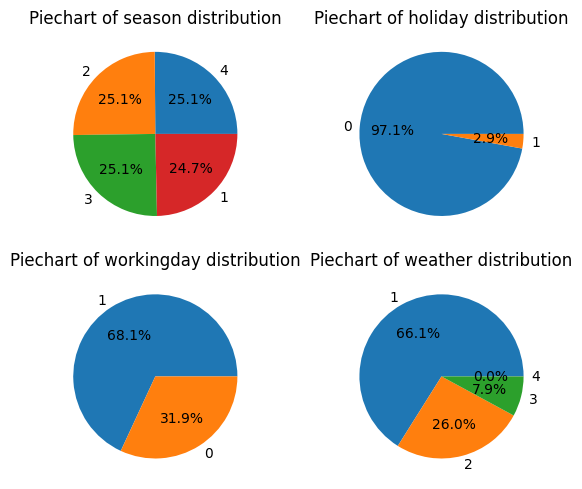

In [ ]:
print('------------------------------Pie-Charts of Categorical variables---------------------------------')
i=0
plt.figure(figsize=(8,5))
for col in cat_col:
  plt.subplot(2,2,i+1)
  plt.title(f'Distribution of {col}')
  plt.title(f'Piechart of {col} distribution')
  plt.pie(data[col].value_counts().values,labels=data[col].value_counts().index,autopct='%1.1f%%')
  plt.tight_layout()
  i+=1
plt.show()

### Observations from Univariate Analysis: Categorical Variables

*   **Season**: The distribution of bike rentals across the four seasons is relatively balanced, with each season having a similar number of entries (around 25% each). Season 4 (Winter) and Season 2 (Summer) have slightly more records, while Season 1 (Spring) has a marginally lower count.
*   **Holiday**: The dataset is heavily skewed towards non-holidays ('0'), with a very small proportion of observations occurring on holidays ('1'). This indicates that most rental data points are from regular working or non-working days rather than official holidays.
*   **Workingday**: There are significantly more working days ('1') than non-working days ('0') in the dataset. This is expected, as weekends and holidays typically constitute a smaller portion of the calendar.
*   **Weather**: The most common weather condition is 'Clear, Few clouds, Partly cloudy' ('1'), accounting for the majority of observations. This is followed by 'Mist + Cloudy' ('2') and 'Light Snow/Rain' ('3'). There is only one instance of 'Heavy Rain/Snow' ('4'), suggesting it's an extreme or rare event in the dataset.

##Numerical columns univariate analysis

Numerical columns : 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', and 'count'

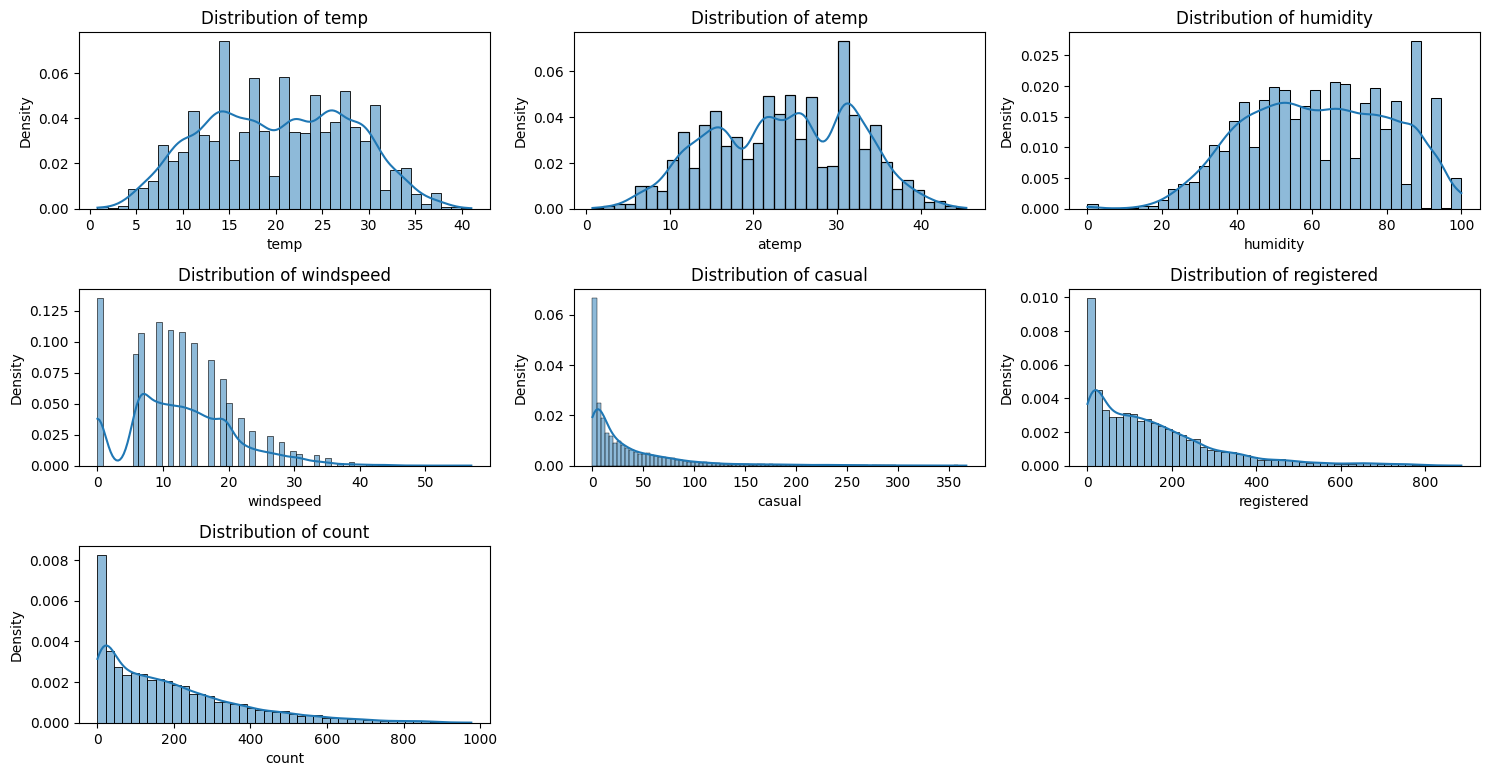

In [ ]:
num_col=['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
plt.figure(figsize=(15, 10))
i=0
for col in num_col:
   # Create a new figure for each plot
  plt.subplot(4,3,i+1)
  sns.histplot(data[col], kde=True, stat='density')
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Density')
  plt.tight_layout()
  i+=1
plt.show()

### Observations from Univariate Analysis: Numerical Variables

*   **Temperature**: Both 'temp' (actual temperature) and 'atemp' (feeling temperature) distributions appear to be **multimodal**, showing several distinct peaks. This suggests that bike rentals are most common across various specific temperature ranges, likely reflecting seasonal variations and optimal conditions for riding throughout the year, rather than just one or two dominant ranges. They are certainly not strictly normally distributed.
*   **Humidity**: The distribution of humidity shows a slight left-skew, indicating a higher frequency of moderate to high humidity values. There are also instances of very low humidity (close to 0), which might warrant further investigation as potential outliers or data anomalies.
*   **Windspeed**: The windspeed distribution is heavily right-skewed, with a large concentration of observations at low windspeeds and a long tail extending towards higher values. This implies that most bike rentals occur during calmer conditions, and high windspeeds are less frequent.
*   **Casual, Registered, and Count**: All three variables exhibit a strong right-skewed distribution. This indicates that for most hours, the number of casual, registered, and total bike rentals is relatively low, with fewer instances of very high rental counts. This is a common pattern for demand-based data.

**Question 1(e).** Check for Outliers and deal with them accordingly.

**Solution:**

#Outlier Detection & Treatment

Numerical columns:'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', and 'count'

--------------------Boxplots for numerical columns to detect outliers-------------------------


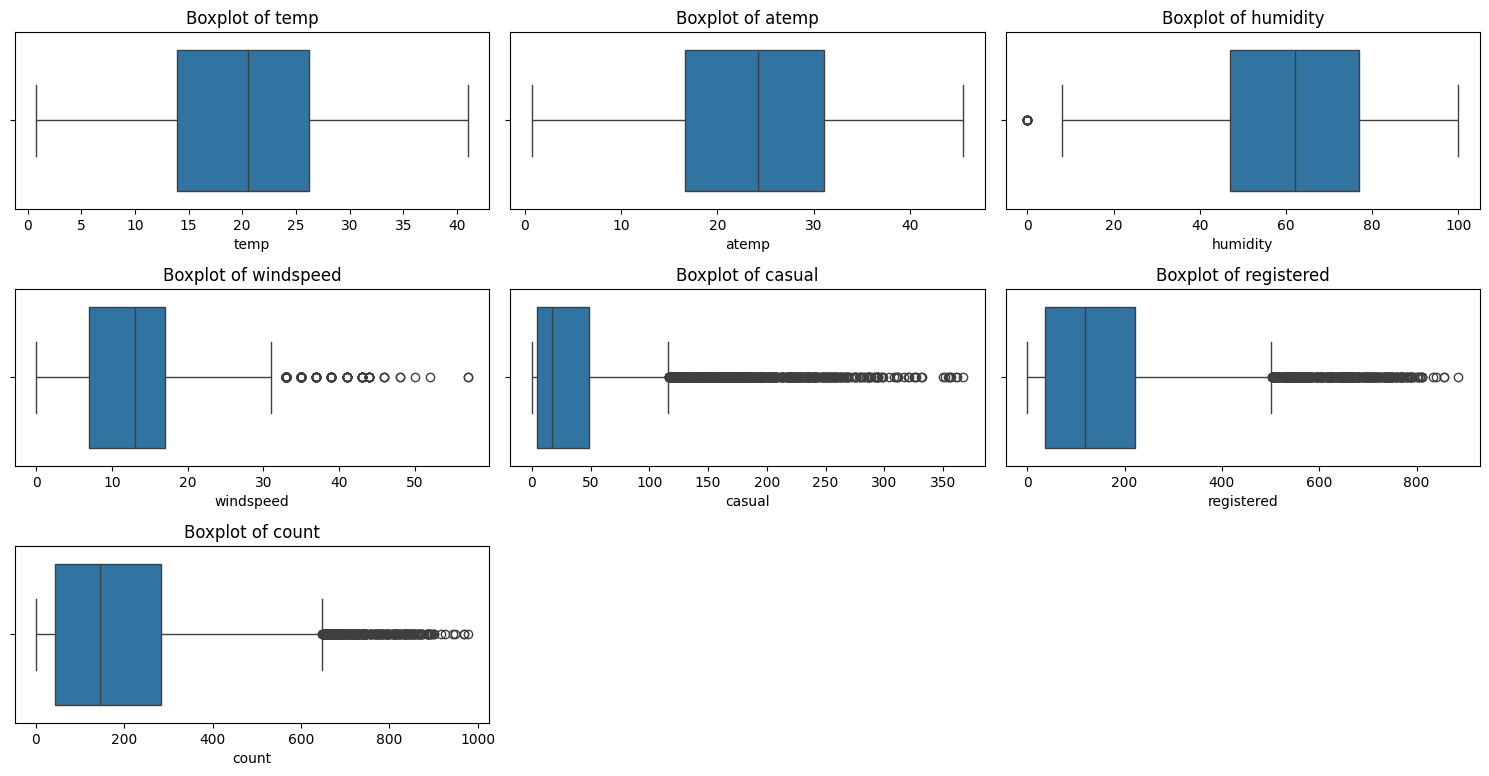

In [ ]:
print('--------------------Boxplots for numerical columns to detect outliers-------------------------')
i=0
plt.figure(figsize=(15,10))
for col in num_col:
  plt.subplot(4, 3, i + 1)
  plt.title(f'Boxplot of {col}')
  sns.boxplot(data[col],orient='h')
  plt.tight_layout()
  i+=1
plt.show()

## Outlier Treatment using IQR

We will use the Interquartile Range (IQR) method to identify and clip outliers in the numerical columns. Values below **Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR** will be capped at these respective bounds.

In [ ]:
num_col=['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
Q1=data[num_col].quantile(0.25)
Q3=data[num_col].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

# Create a mask for outliers across numerical columns
outlier_mask = ((data[num_col] < lower_bound) | (data[num_col] > upper_bound)).any(axis=1)

# Filter the original DataFrame to exclude rows with outliers in any numerical column
data_iqr = data[~outlier_mask]


--------------------Boxplots for numerical columns after outliers treatment-------------------------


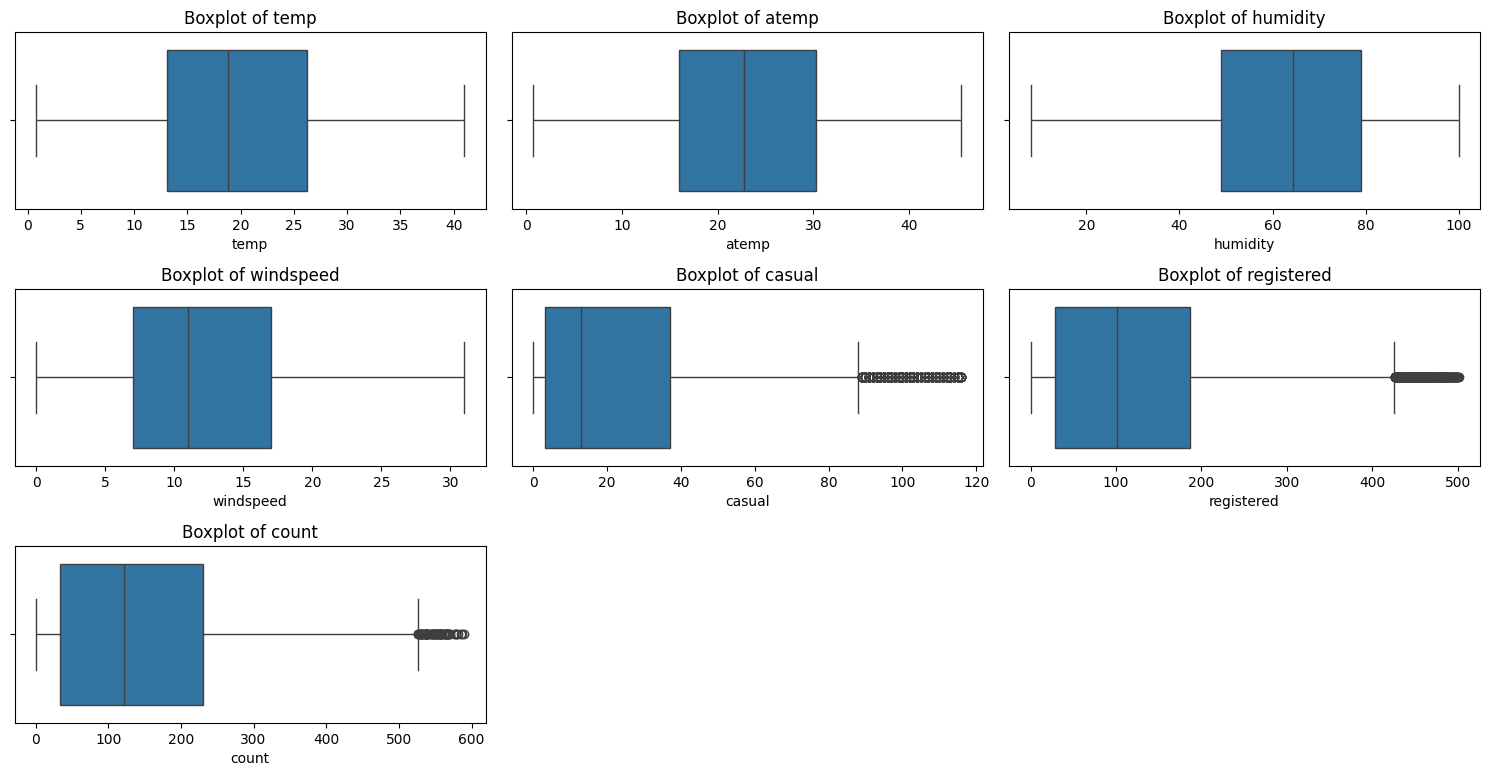

In [ ]:
print('--------------------Boxplots for numerical columns after outliers treatment-------------------------')
i=0
plt.figure(figsize=(15,10))
for col in num_col:
  plt.subplot(4, 3, i + 1)
  plt.title(f'Boxplot of {col}')
  sns.boxplot(data_iqr[col],orient='h')
  plt.tight_layout()
  i+=1
plt.show()

In [ ]:
print(f'Shape of original data:{data.shape}')
print(f'Shape of outliers treated data:{data_iqr.shape}')

Shape of original data:(10886, 12)
Shape of outliers treated data:(9518, 12)


In [ ]:
rows_deleted=data.shape[0]-data_iqr.shape[0]
percent_loss=rows_deleted*100/data.shape[0]
print(f'Data loss by outlier treatment is: {percent_loss:.2f}%')

Data loss by outlier treatment is: 12.57%


###**Observation on Outliers:**
Its evident that **12%** is a huge data loss so, we will proceed with our original data for hypothesis testing. We will be using either non-parametric tests or tests that are robust to outliers and skewness.

**Question 2.** Try establishing a Relationship between the Dependent and Independent Variables.

**Solution:**

# Correlation Heatmap

To understand the relationships between numerical variables, especially between the dependent variable ('count') and independent variables, we will generate a correlation heatmap.

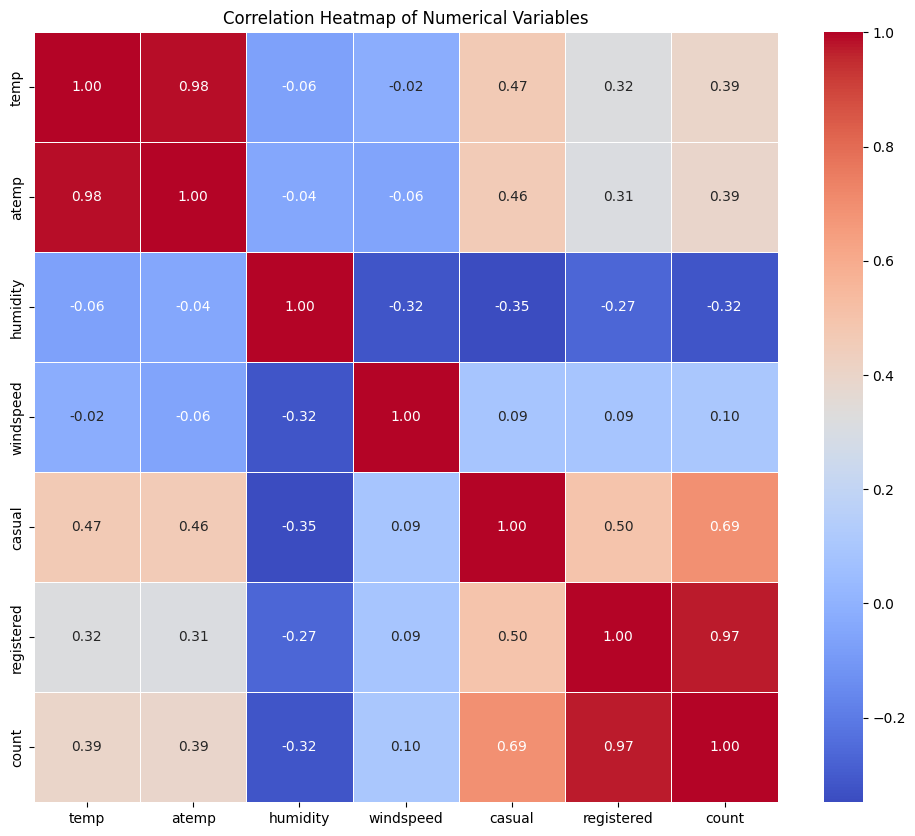

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(data[num_col].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

## Observations from the Correlation Heatmap:

*   **'count' (Total Rentals) Correlation**: As expected, 'count' is highly positively correlated with both 'registered' users (0.97) and 'casual' users (0.70). This is logical since 'count' is the sum of 'registered' and 'casual'.
*   **Temperature ('temp', 'atemp')**: Both 'temp' and 'atemp' show a strong positive correlation with 'count' (around 0.39-0.40). This indicates that as temperature increases, the number of bike rentals generally increases.
*   **Humidity**: 'humidity' shows a negative correlation with 'count' (-0.32), suggesting that higher humidity levels are associated with fewer bike rentals.
*   **Windspeed**: 'windspeed' has a very weak negative correlation with 'count' (-0.02), indicating it has minimal linear impact on bike rentals.

*   **Multicollinearity**: A significant observation is the extremely high positive correlation between 'temp' and 'atemp' (0.99). This indicates a strong multicollinearity between these two features.

Due to the very high correlation between 'temp' and 'atemp', we should consider removing one of them to avoid multicollinearity issues in any future modeling. Since 'temp' is the actual temperature, it's generally preferred to keep 'temp' and drop 'atemp'.

casual and registered: These two columns represent the number of casual and registered users, respectively. The count column (total rentals) is simply the sum of casual and registered. We can consider dropping them too.

In [ ]:
data.drop(['atemp', 'casual', 'registered'], axis=1, inplace=True)
print("Columns after dropping 'atemp', 'casual', and 'registered':")
display(data.columns)

Columns after dropping 'atemp', 'casual', and 'registered':


Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'humidity', 'windspeed', 'count'],
      dtype='object')

**Question 3.** Check if there any significant difference between the no. of bike rides on Weekdays
and Weekends?

**Solution:**

In [ ]:
data['workingday'].value_counts()

,count
workingday,
1,7412
0,3474


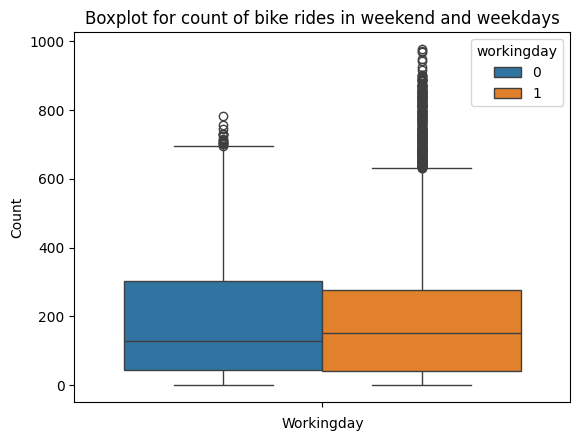

In [ ]:
#Analysing distribution of ride counts in weekend and weekdays
sns.boxplot(y=data['count'],hue=data['workingday'])
plt.title('Boxplot for count of bike rides in weekend and weekdays')
plt.xlabel('Workingday')
plt.ylabel('Count')
plt.show()

From boxplot we observe there is not much difference in ride counts in weekend and over weekdays.

Formulating hypothesis:

**H0(Null):** No of bike rides in weekends = no of bike rides in the weekdays.

**H1(Alternate):** No of bike rides in weekend> no of bike rides in weekdays.

We can apply 2 sample independent t-test to check for the significance of differnce observed.

In [ ]:
# we check for assumptions of 2 sample t test- independent observations, normality , equal variances

In [ ]:
weekend_rides=data['count'][data['workingday']==0]
weekday_rides=data['count'][data['workingday']==1]

Visually checking normality

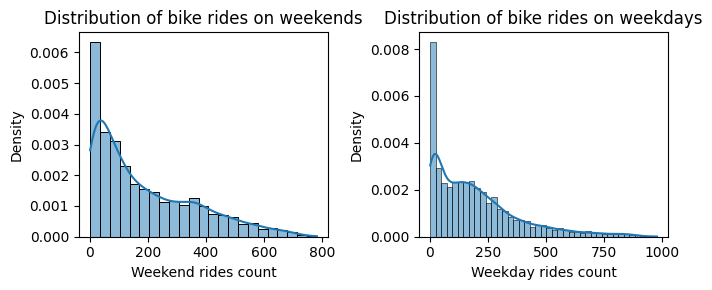

In [ ]:
#First checking normality visually
plt.figure(figsize=(7,3))

plt.subplot(1,2,1)
sns.histplot(weekend_rides,stat='density', kde=True)
plt.title('Distribution of bike rides on weekends')
plt.xlabel('Weekend rides count')
plt.ylabel('Density')

plt.subplot(122)
sns.histplot(weekday_rides,stat='density', kde=True)
plt.title('Distribution of bike rides on weekdays')
plt.xlabel('Weekday rides count')
plt.ylabel('Density')

plt.tight_layout()
plt.show()



Distribution of both categories have strong right skewness.

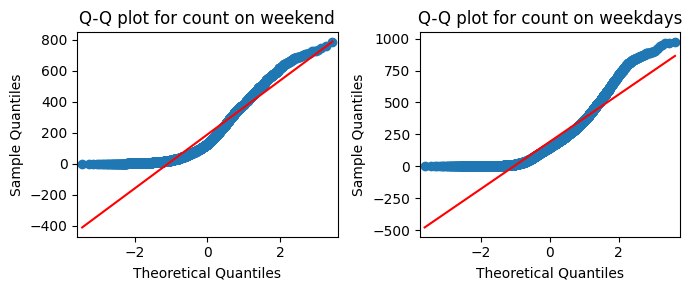

In [ ]:
#Now checking normality using qq plot
plt.figure(figsize=(7,3))
plt.subplot(121)
qqplot(weekend_rides,line='s',ax=plt.gca())
plt.title('Q-Q plot for count on weekend')
plt.subplot(122)
qqplot(weekday_rides,line='s',ax=plt.gca())
plt.title('Q-Q plot for count on weekdays')
plt.tight_layout()
plt.show()

In [ ]:
#Checking skewness of distributions
print(f'Skewness in bike rides count on weekends is: {weekend_rides.skew()}')
print(f'Skewness in bike rides count on weekdays is: {weekday_rides.skew()}')

Skewness in bike rides count on weekends is: 0.9640377812359698
Skewness in bike rides count on weekdays is: 1.3467224377106803


In [ ]:
#Checking Kurtosis of distributions
print(f'Kurtosis in bike rides count on weekends is: {weekend_rides.kurt()}')
print(f'Kurtosis in bike rides count on weekdays is: {weekday_rides.kurt()}')

Kurtosis in bike rides count on weekends is: 0.03637652448357587
Kurtosis in bike rides count on weekdays is: 1.732350506896827


* Both the distributions are right skewed and platykurtic.
* Even from histplots its clear that distributions are right skewed so we will do log transformation before performing t test

In [ ]:
#log transformation
data['log_count']=np.log1p(data['count'])

In [ ]:
weekend_log_rides=data[data['workingday']==0]['log_count']
weekday_log_rides=data[data['workingday']==1]['log_count']

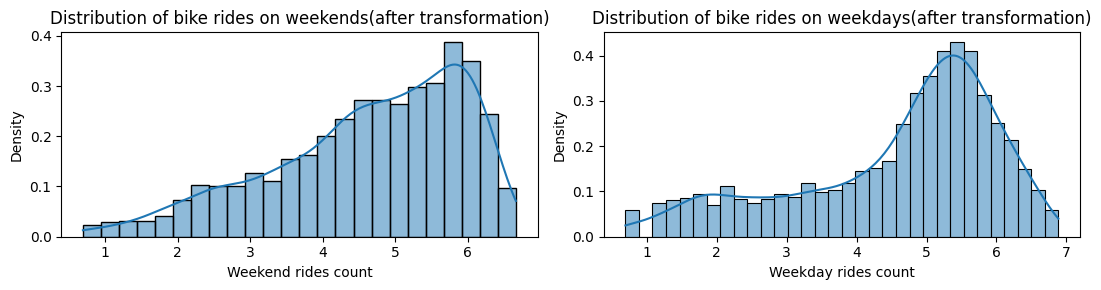

In [ ]:
#Again checking normality visually after log transformation
plt.figure(figsize=(11,3))

plt.subplot(1,2,1)
sns.histplot(weekend_log_rides,stat='density', kde=True)
plt.title('Distribution of bike rides on weekends(after transformation)')
plt.xlabel('Weekend rides count')
plt.ylabel('Density')

plt.subplot(122)
sns.histplot(weekday_log_rides,stat='density', kde=True)
plt.title('Distribution of bike rides on weekdays(after transformation)')
plt.xlabel('Weekday rides count')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

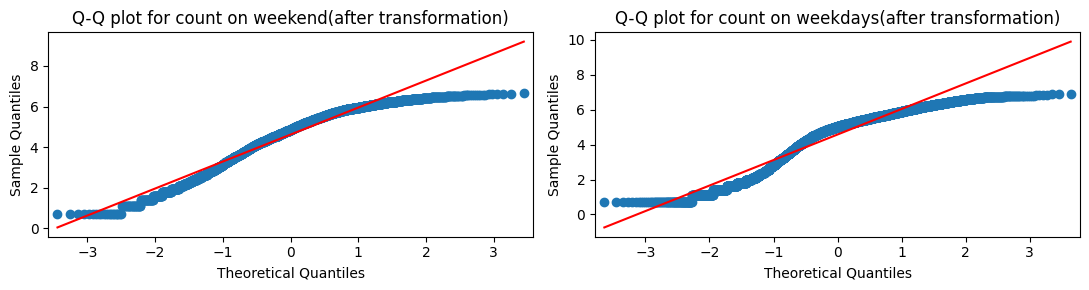

In [ ]:
#Now checking normality using qq plot(after transformation)
plt.figure(figsize=(11,3))
plt.subplot(121)
qqplot(weekend_log_rides,line='s',ax=plt.gca())
plt.title('Q-Q plot for count on weekend(after transformation)')
plt.subplot(122)
qqplot(weekday_log_rides,line='s',ax=plt.gca())
plt.title('Q-Q plot for count on weekdays(after transformation)')
plt.tight_layout()
plt.show()

Statistically checking normality now.

In [ ]:
#Performing Shapiro after transformation on small random sample to again check normality
# Shapiro is not efficient with very large sample size(>5000)
sample_size = 300
weekday_log_rides_sample = data[data['workingday'] == 1]['log_count'].sample(n=sample_size, random_state=42) # random_state for reproducibility
weekend_log_rides_sample = data[data['workingday'] == 0]['log_count'].sample(n=sample_size, random_state=42)

print(f"--- Shapiro-Wilk Test on Random Samples (n={sample_size}) ---")

stat_end_sam, p_end = shapiro(weekend_log_rides_sample)
stat_day_sam, p_day = shapiro(weekday_log_rides_sample)

print(f"Shapiro-Wilk Test for log_count (Weekend Sample): Statistic={stat_end_sam:.3f}, p-value={p_end}")
print(f"Shapiro-Wilk Test for log_count (Weekday Sample): Statistic={stat_day_sam:.3f}, p-value={p_day}")

alpha = 0.05

if p_end < alpha:
    print(f"Weekend Sample: Fail to assume normality (p < {alpha})")
else:
    print(f"Weekend Sample: Assume normality (p >= {alpha})")

if p_day < alpha:
    print(f"Weekday Sample: Fail to assume normality (p < {alpha})")
else:
    print(f"Weekday Sample: Assume normality (p >= {alpha})")

--- Shapiro-Wilk Test on Random Samples (n=300) ---
Shapiro-Wilk Test for log_count (Weekend Sample): Statistic=0.946, p-value=5.471904161941471e-09
Shapiro-Wilk Test for log_count (Weekday Sample): Statistic=0.913, p-value=3.3266393860558377e-12
Weekend Sample: Fail to assume normality (p < 0.05)
Weekday Sample: Fail to assume normality (p < 0.05)


* Though Shapiro Wilk test tells that distribution isnt normal but still we can atill proceed with t-test because of large sample size and **CLT which states that if you take sufficiently large random samples from any population (regardless of its original distribution), the distribution of the sample means of those samples will be approximately normally distributed.**
* Because of CLT we can say that  even if the underlying log_count distributions for weekdays and weekends aren't perfectly normal, the sampling distribution of the mean log-count for both groups, and thus the sampling distribution of the difference between these means, would be approximately normal.

This ensures the validity of the p-values calculated by the t-test, allowing us to make reliable conclusions about the population means.


In [ ]:
#now checking for variance euality after transformation
#Similar to Shapiro , Levene Test will be performed on smaller sample size to avoid sensitivity
sample_size=300
print(f'----Performing Levene Test on weekend and weekday ride count random sample(n={sample_size})------')
stat_l_log, p_val_log=levene(weekend_log_rides,weekday_log_rides)
print(f"Levene test on log counts: Statistics:{stat_l_log:.3f}, p-value:{p_val_log:.3f}")
alpha=0.05
if p_val_log < alpha:
    print(f"Since p-value ({p_val_log:.3f}) < alpha ({alpha}), we reject the Null Hypothesis.")
    print(f"Conclusion: Variances have significant difference.")
else:
    print(f"Since p-value ({p_val_log:.3f}) >= alpha ({alpha}), we fail to reject the Null Hypothesis.")
    print('Conclusion: Variances are equal.')

----Performing Levene Test on weekend and weekday ride count random sample(n=300)------
Levene test on log counts: Statistics:6.526, p-value:0.011
Since p-value (0.011) < alpha (0.05), we reject the Null Hypothesis.
Conclusion: Variances have significant difference.


Since we are unable to have assumptions of equal variance true even after log transformation so we will use Welch's t-test that doesn't have assumption of equal variance among groups.

In [ ]:
print('\n--- Performing Welch\'s t-test for unequal variances ---')
stat_welch, p_welch = ttest_ind(weekday_log_rides, weekend_log_rides, equal_var=False, alternative='greater') # equal_var=False for Welch's t-test and greater because one tailed test
print(f"Welch's T-test on log_count: Statistic={stat_welch:.3f}, p-value={p_welch:.3f}")
alpha = 0.05 # Significance level
if p_welch < alpha:
    print(f"Since p-value ({p_welch:.3f}) < alpha ({alpha}), we reject the Null Hypothesis.")
    print("Conclusion: The average log-transformed number of bike rides in weekdays is less than weekends.")
else:
    print(f"Since p-value ({p_welch:.3f}) >= alpha ({alpha}), we fail to reject the Null Hypothesis.")
    print("Conclusion: There is no significant difference in the average log-transformed number of bike rides between weekdays and weekends.")


--- Performing Welch's t-test for unequal variances ---
Welch's T-test on log_count: Statistic=-1.655, p-value=0.951
Since p-value (0.951) >= alpha (0.05), we fail to reject the Null Hypothesis.
Conclusion: There is no significant difference in the average log-transformed number of bike rides between weekdays and weekends.


When interpreting results from log-transformed data, a significant mean difference implies a significant difference in the *geometric means* or *ratios* on the original scale. Conversely, a non-significant result (like our weekday/weekend test) means no significant difference in the *average geometric mean* of the original counts after accounting for skewness. This provides robust conclusions about the central tendency of the raw data.

## **Inferences & Conclusions (Hypothesis Test)**:

*   **Hypothesis**: We tested whether there is a significant difference in the average number of bike rides between weekdays and weekends/holidays, after applying a *log1p transformation* to the 'count' variable.
*   **Test Used**: A Welch's t-test was performed on the log-transformed data, which is appropriate given the large sample sizes and the unequal variances between the two groups (as indicated by Levene's test).
*   **Result**: The p-value obtained from the Welch's t-test was approximately **0.951**.
*   **Decision**: Since the p-value (0.951) is greater than our chosen significance level (alpha = 0.05), we **fail to reject the null hypothesis**.
*   **Conclusion**: There is **no statistically significant difference** in the *average hourly log-transformed number of bike rides between weekdays and weekends/holidays*. This means the observed difference in sample means could reasonably be attributed to random chance.
*   **Visual Confirmation**: The boxplot of the bike counts for weekdays and weekends/holidays visually supported this finding, showing very similar medians and interquartile ranges, indicating overlapping distributions.

## **Recommendations:**

1.  **Beyond Binary Day Type**: A simple distinction between 'workingday' and 'non-workingday' does not, on average (hourly, log-transformed), lead to significantly different bike rental volumes. For deeper insights, consider exploring more granular features.
2.  **Explore Time-of-Day Patterns**: While the *average hourly* count might not differ, the *distribution* of demand within those hours likely varies. Weekdays might show commuter peaks (morning/evening), while weekends might have a more spread-out, mid-day peak. Analyzing demand by *hour of the day* (possibly interacting with *workingday*) could reveal significant differences in usage patterns.
3.  **Impact of Other Categorical Variables**: Revisit the impact of other categorical variables like 'season' and 'weather' on bike rental counts, as these might have a more pronounced influence, potentially even interacting with the day type.
4.  **Business Strategy**: For operational planning (e.g., bike redistribution, staffing), relying solely on a 'weekday vs. weekend' distinction might be insufficient. A more nuanced model incorporating time of day, weather, and seasonal factors would likely be more effective.

**Question 4.** Check if the demand of bicycles on rent is the same for different Weather
conditions?

**Solution:**

In [ ]:
data['weather'].value_counts()

,count
weather,
1,7192
2,2834
3,859
4,1


In [ ]:
#Since 4 categories of variable so we can use one way ANOVA

Since weather 4 has only one observation either it was a typo or outlier. Given the big size of data we can drop this outlier.

In [ ]:
# Remove the row where 'weather' is 4
data = data[data['weather'] != 4]
print("Value counts for 'weather' after removing weather condition 4:")
display(data['weather'].value_counts())

Value counts for 'weather' after removing weather condition 4:


,count
weather,
1,7192
2,2834
3,859


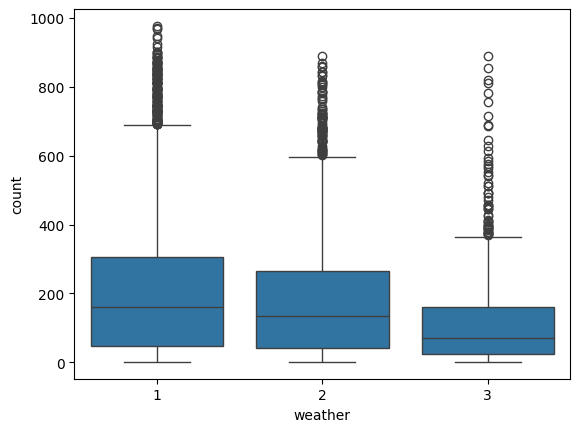

In [ ]:
sns.boxplot(x=data['weather'],y=data['count'])
plt.show()

Boxplot shows significant difference in rides in different weather conditions.

In [ ]:
weather_1=data['count'][data['weather']==1]
weather_2=data['count'][data['weather']==2]
weather_3=data['count'][data['weather']==3]

**Hypothesis formulation:**

**H0(Null):** Bicycle demand has no significant difference among different weather conditions.

**H1(Alternate):** There is significant difference in bicycle demands in different weather conditions.

Since we have to compare numerical variable with more than 2 categories so we can use 1 way ANOVA test.

We will check assumptions of one way ANOVA test

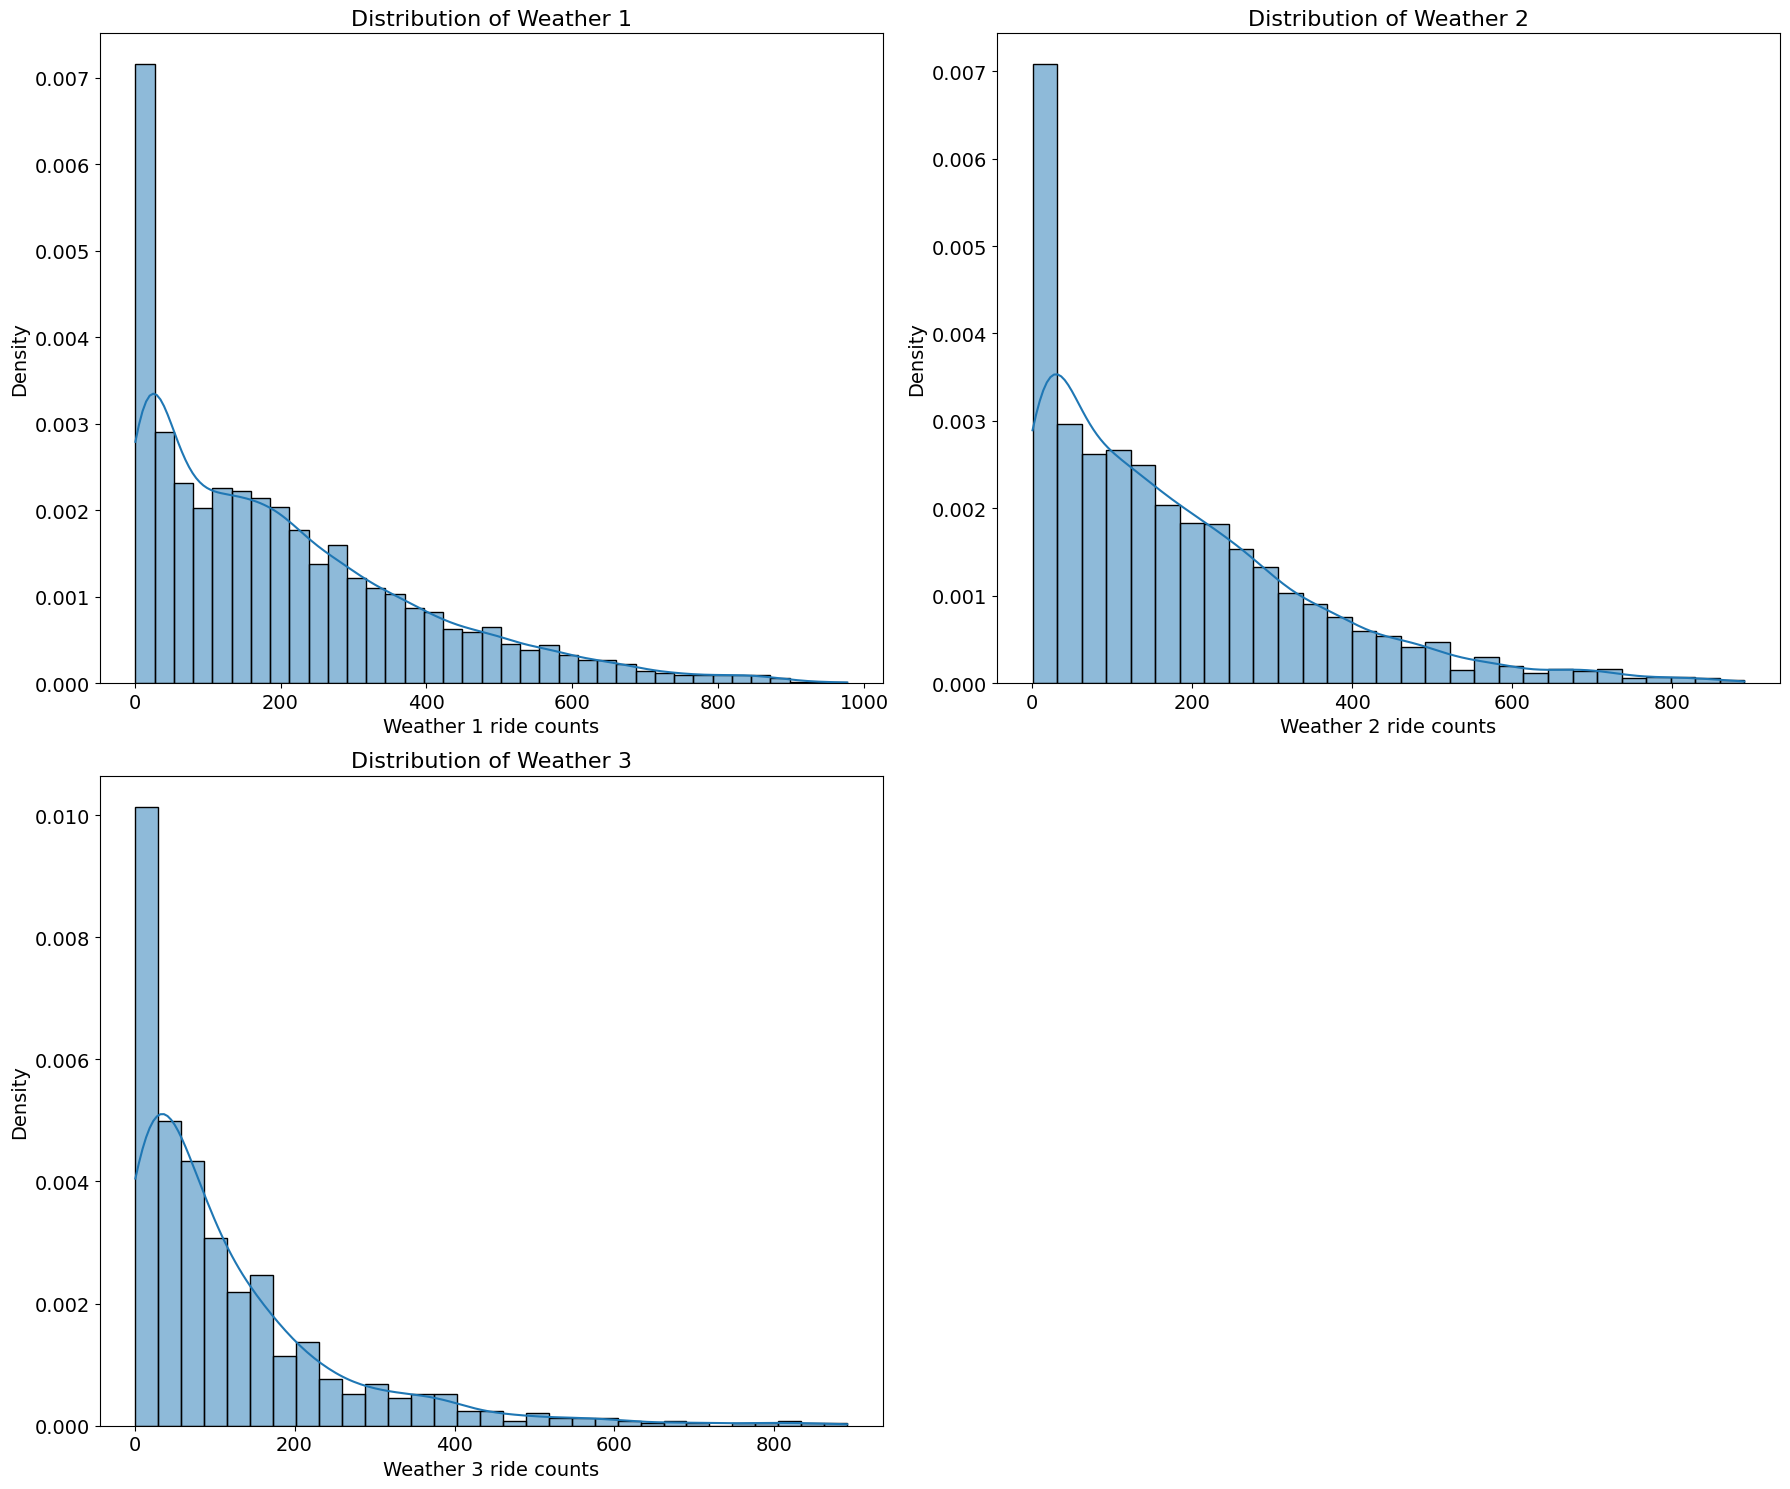

In [ ]:
#checking distribution of these groups
plt.figure(figsize=(18,15))

plt.subplot(2,2,1)
sns.histplot(weather_1, stat='density', kde= True)
plt.xlabel('Weather 1 ride counts',fontsize=14)
plt.ylabel('Density',fontsize=14)
plt.title('Distribution of Weather 1',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.subplot(2,2,2)
sns.histplot(weather_2, stat='density', kde= True)
plt.xlabel('Weather 2 ride counts',fontsize=14)
plt.ylabel('Density',fontsize=14)
plt.title('Distribution of Weather 2',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(2,2,3)
sns.histplot(weather_3, stat='density', kde= True)
plt.xlabel('Weather 3 ride counts',fontsize=14)
plt.ylabel('Density',fontsize=14)
plt.title('Distribution of Weather 3',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()

HIstplots shows strong positive skewness in all weathers distribution

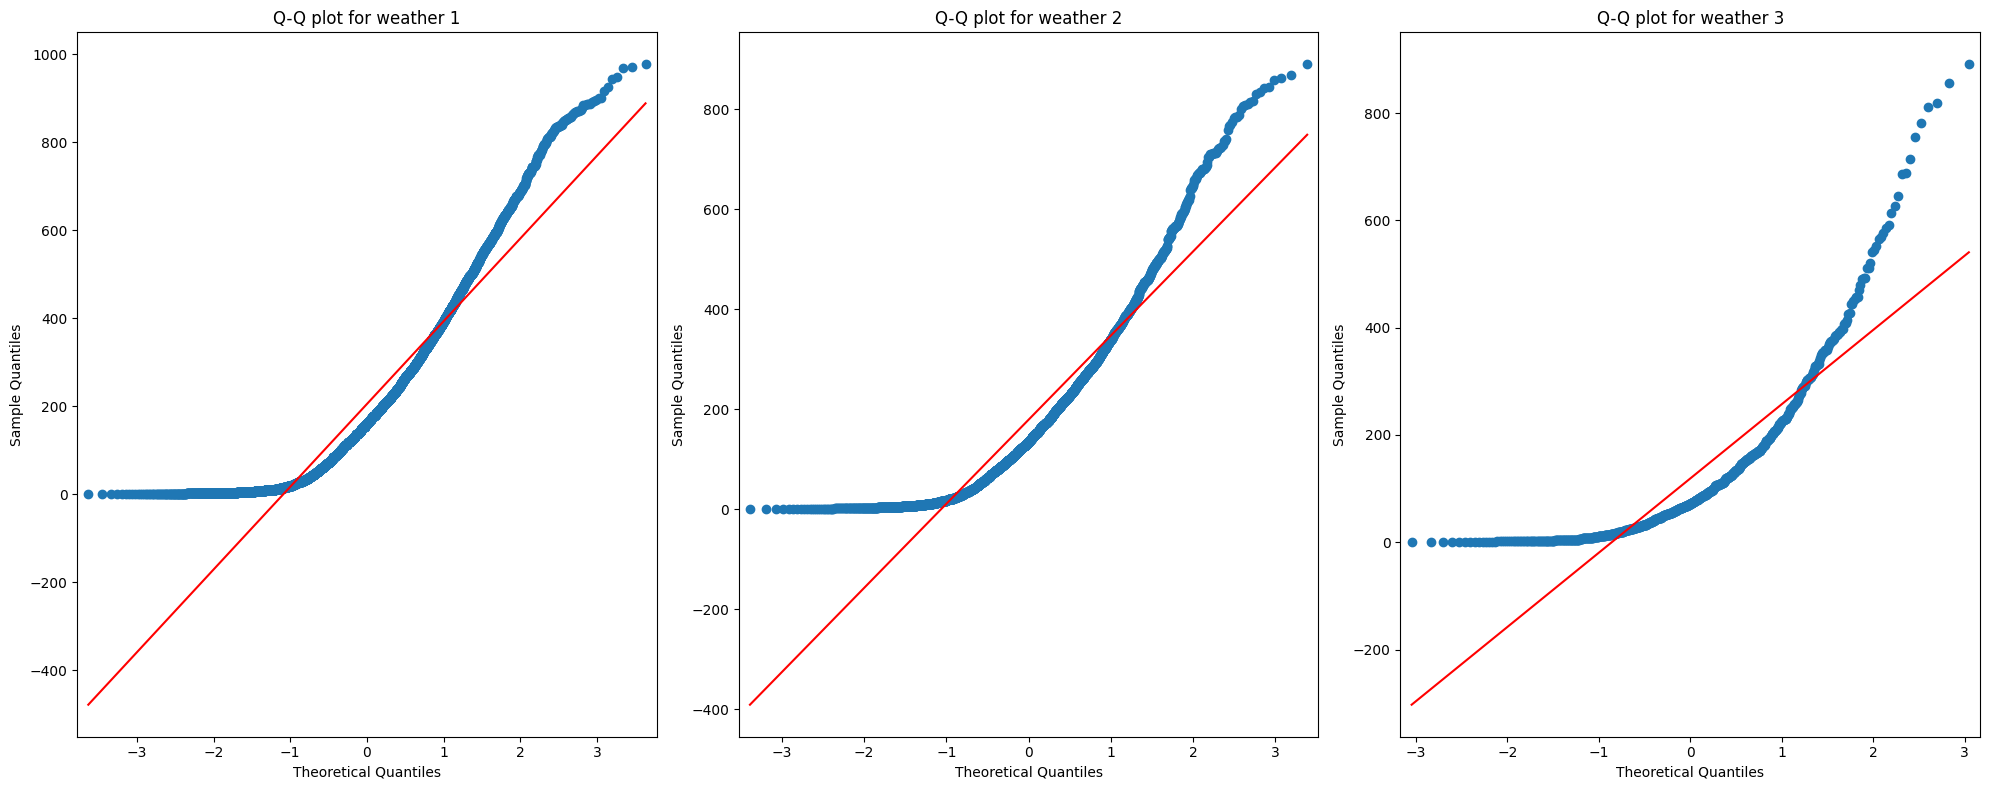

In [ ]:
#checking normality through qq plots
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
qqplot(weather_1,line='s', ax=plt.gca())
plt.title('Q-Q plot for weather 1')
plt.subplot(1,3,2)
qqplot(weather_2,line='s', ax=plt.gca())
plt.title('Q-Q plot for weather 2')
plt.subplot(1,3,3)
qqplot(weather_3,line='s', ax=plt.gca())
plt.title('Q-Q plot for weather 3')
plt.tight_layout()
plt.show()

QQ plots confirms heavy tails in distributions all three weather conditions.

In [ ]:
#checking skewness
print(f'Skewness in bike rides count in weather 1 is: {weather_1.skew():.3f}')
print(f'Skewness in bike rides count in weather 2 is: {weather_2.skew():.3f}')
print(f'Skewness in bike rides count in weather 3 is: {weather_3.skew():.3f}')

Skewness in bike rides count in weather 1 is: 1.140
Skewness in bike rides count in weather 2 is: 1.294
Skewness in bike rides count in weather 3 is: 2.187


All of the groups are positively(right) skewed

In [ ]:
#checking kurtosis
print(f'Kurtosis in bike rides count in weather 1 is: {weather_1.kurt():.3f}')
print(f'Kurtosis in bike rides count in weather 2 is: {weather_2.kurt():.3f}')
print(f'Kurtosis in bike rides count in weather 3 is: {weather_3.kurt():.3f}')

Kurtosis in bike rides count in weather 1 is: 0.965
Kurtosis in bike rides count in weather 2 is: 1.588
Kurtosis in bike rides count in weather 3 is: 6.003


Weather 1 and 2 are Platykurtic and weather 3 bicycle count distribution is Leptokurtic.

In [ ]:
#checking normality statistically through Shapiro-Wilk's test
stats_w1,p_w1=shapiro(weather_1)
stats_w2,p_w2=shapiro(weather_2)
stats_w3,p_w3=shapiro(weather_3)
print('----Shapiro test performed to check normality----')
print(f'p-value for weather 1 is: {p_w1}')
print(f'p-value for weather 2 is: {p_w2}')

print(f'p-value for weather 3 is: {p_w3}')

----Shapiro test performed to check normality----
p-value for weather 1 is: 1.5964921477006555e-57
p-value for weather 2 is: 9.777839106111785e-43
p-value for weather 3 is: 3.875893017396149e-33


In [ ]:
print('-----Results of Shipro -Wilk test-----')
alpha=0.05 #significance
if p_w1<alpha:
  print('Distribution of weather 1 significantly differ from normal distribution')
else:
  print('Distribution of weather 1 likely follows normal distribution')
if p_w2<alpha:
  print('Distribution of weather 2 significantly differ from normal distribution')
else:
  print('Distribution of weather 2 likely follows normal distribution')
if p_w3<alpha:
  print('Distribution of weather 3 significantly differ from normal distribution')
else:
  print('Distribution of weather 3 likely follows normal distribution')

-----Results of Shipro -Wilk test-----
Distribution of weather 1 significantly differ from normal distribution
Distribution of weather 2 significantly differ from normal distribution
Distribution of weather 3 significantly differ from normal distribution


In [ ]:
#Levene test to check variability in variances among different weather conditions
stats_l, p_val_l=levene(weather_1,weather_2,weather_3)
print('----Levene test performed to check for equal variance-----')
print(f'p-value for Levene test is: {p_val_l}')

alpha=0.05   #significance level
if p_val_l < alpha:
    print(f"Variances have significant difference among groups(p<{alpha})")
else:
    print(f'Variances are relatively equal among groups(p>{alpha})')

----Levene test performed to check for equal variance-----
p-value for Levene test is: 6.198278710731511e-36
Variances have significant difference among groups(p<0.05)


All these shows deviation from assumptions of one way anova.

We either have to perform tranformation or use other non parametric test like Kruskal-Wallis test

In [ ]:
#Applying Kruskal-Wallis test which doesn't have assumption of normality or equal variance
#Hypothesis formulation
#H0(Null): All weather groups have relatively equal median of bicycle ride count
#H1(Alternate): Atleast one weather group has different median of bicycle ride count
stat, kruskal_p = kruskal(weather_1, weather_2, weather_3)
print("-----Kruskal-Wallis Test:-----")
print(f"Statistic: {stat:.3f}")
print(f"p-value: {kruskal_p}")
if kruskal_p < alpha:
  print(f'Since p-value < {alpha}, we reject the null hypothesis')
  print(f'Conclusion: Median of bicycle ride count is not equal for all weather groups')
else:
  print(f'Since p-value > {alpha}, we fail to reject the null hypothesis')
  print(f'Conclusion: There is significant differnce in Median of bicycle ride count among all weather groups')

-----Kruskal-Wallis Test:-----
Statistic: 204.956
p-value: 3.122066178659941e-45
Since p-value < 0.05, we reject the null hypothesis
Conclusion: Median of bicycle ride count is not equal for all weather groups


There is statistically significant difference in demand for rides on different weathers.

## **Inferences & Conclusions (Weather Condition bicycle demand Hypothesis Test)**:

*   **Hypothesis**: We tested whether the demand for bicycles on rent is the same for different weather conditions (H0: Medians are equal; H1: At least one median is different).
*   **Test Used**: A Kruskal-Wallis H-test was performed. This non-parametric test was chosen because the assumptions for ANOVA (normality and homogeneity of variances) were significantly violated, as evidenced by:
    *   **Histograms and QQ Plots**: Showed strong positive skewness and heavy tails for bike counts in all weather categories.
    *   **Shapiro-Wilk Test**: Indicated statistically significant non-normality (very small p-values) even on smaller samples.
    *   **Levene's Test**: Indicated statistically significant unequal variances across the weather groups.
    *   **Visual Outliers**: Boxplots confirmed the presence of many outliers in all weather conditions.
*   **Result**: The Kruskal-Wallis test had an extremely small p-value of 3.122e-45.
*   **Decision**: Since the p-value (3.122e-45) is much less than our chosen significance level (alpha = 0.05), we **reject the null hypothesis**.
*   **Conclusion**: There is **a statistically significant difference** in the median number of bike rides across different weather conditions. This means that weather conditions indeed have a significant impact on the demand for bike rentals.
*   **Visual Confirmation**: The initial boxplot comparing bike counts across weather conditions visually supported this finding, showing clear differences in medians and distributions, particularly a sharp drop in median counts as weather conditions worsened.

## **Recommendations (Weather Conditions)**:

1.  **Prioritize Clear Weather**: Bike rental demand is highest during clear weather (Weather 1). Operations should be optimized to maximize availability and service during these conditions.
2.  **Anticipate Demand Drop with Adverse Weather**: Expect a significant drop in demand during less favorable weather (Mist/Cloudy - Weather 2, and Light Rain/Snow - Weather 3). Resource allocation (e.g., fewer bikes, reduced staffing) should be adjusted accordingly to avoid oversupply and manage costs.
3.  **Dynamic Pricing/Promotions**: Consider implementing dynamic pricing or promotional strategies for less favorable weather conditions to stimulate demand, if appropriate.
4.  **Weather-Resilient Infrastructure**: Invest in weather-resilient bikes or infrastructure (e.g., covered parking) if aiming to maintain higher usage during adverse conditions.


**Question 5.** Check if the demand of bicycles on rent is the same for different Seasons?

**Solution:**

In [ ]:
data['season'].value_counts()

,count
season,
4,2734
2,2733
3,2733
1,2685


Although the count of bikes rented in different seasons are very close to each other. Lets analyse the distribution.

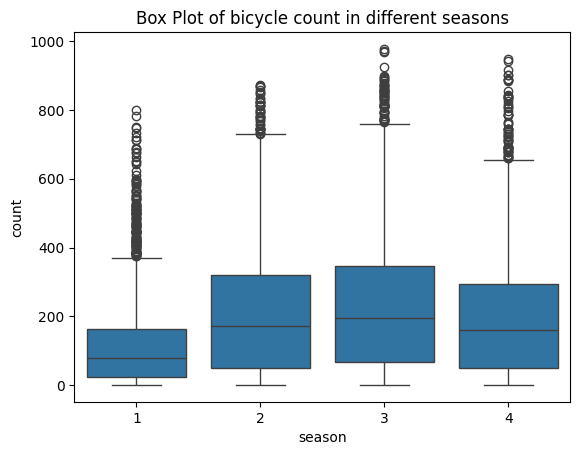

In [ ]:
sns.boxplot(x=data['season'],y=data['count'])
plt.title('Box Plot of bicycle count in different seasons')
plt.show()

There seems difference in distribution(Median, Spread) of bike rented counts in different seasons.

**Hypothesis Formulation:**

**H0(Null):** Average Ride count in different seasons are equal.

**H1(Alternate):** There is significant difference in ride counts in differnt seasons.

Since we have >2 categories of seasons, so we can use 1 way ANOVA Test(if assumptions are met)

In [ ]:
season_1=data['count'][data['season']==1]
season_2=data['count'][data['season']==2]
season_3=data['count'][data['season']==3]
season_4=data['count'][data['season']==4]


We will check assumptions of ANOVA test - Normality and equal variance condition

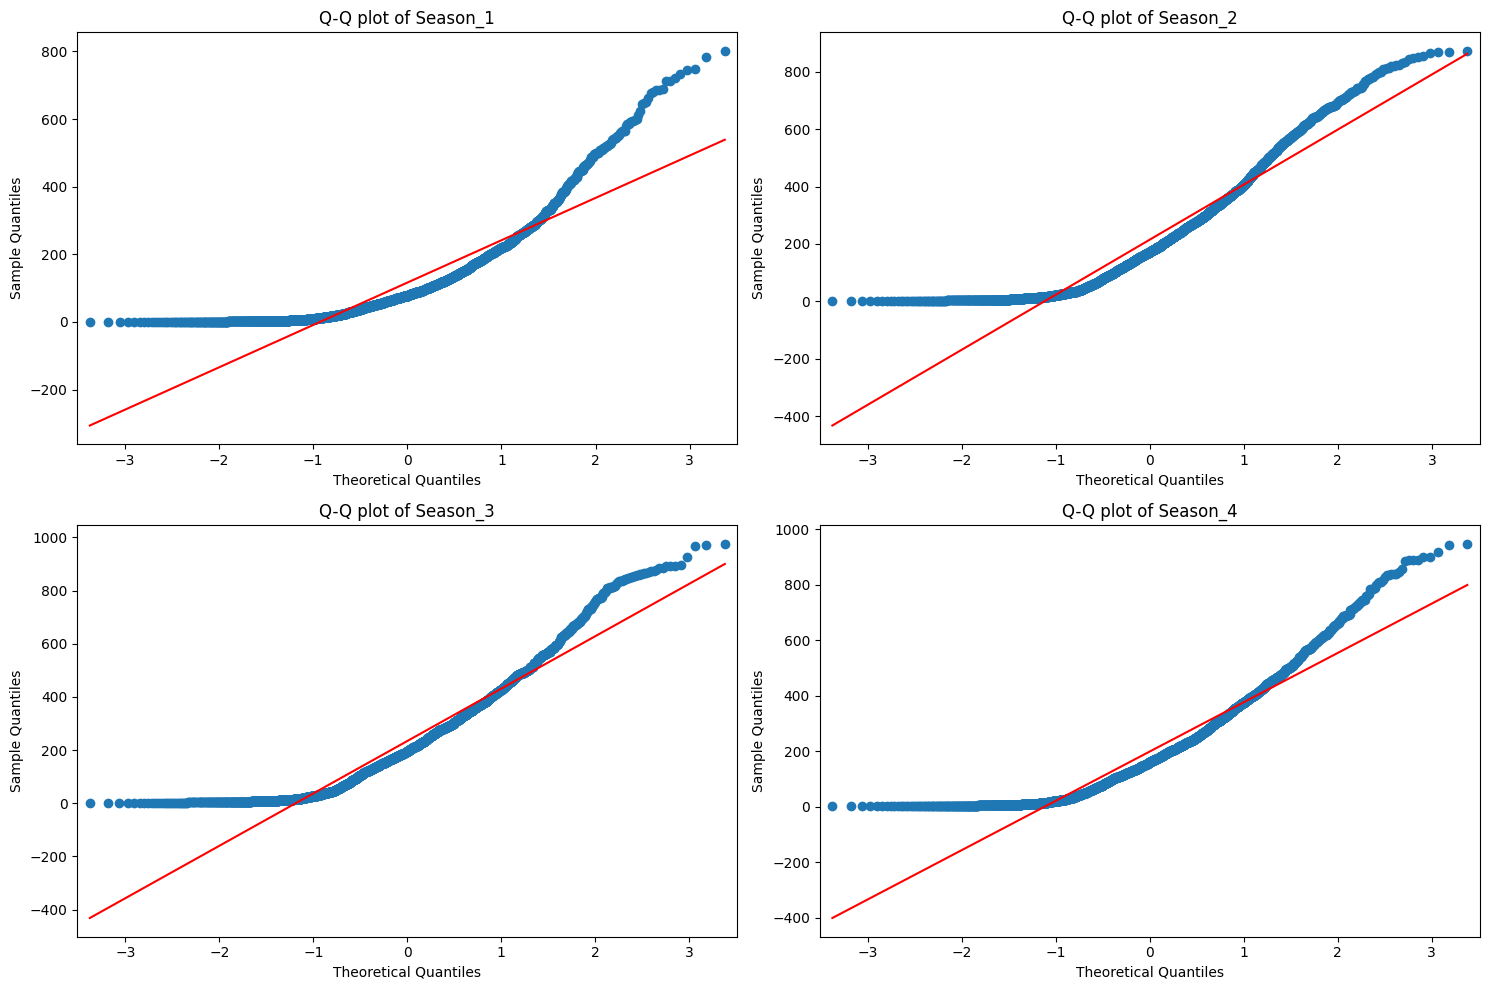

In [ ]:
#First lets check for normality using qq plots
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
qqplot(season_1, line='s', ax=plt.gca())
plt.title('Q-Q plot of Season_1')

plt.subplot(2,2,2)
qqplot(season_2, line='s', ax=plt.gca())
plt.title('Q-Q plot of Season_2')

plt.subplot(2,2,3)
qqplot(season_3, line='s', ax=plt.gca())
plt.title('Q-Q plot of Season_3')

plt.subplot(2,2,4)
qqplot(season_4, line='s', ax=plt.gca())
plt.title('Q-Q plot of Season_4')

plt.tight_layout()
plt.show()


QQ-plots suggests heavier tails means deviation from Normal distribution.

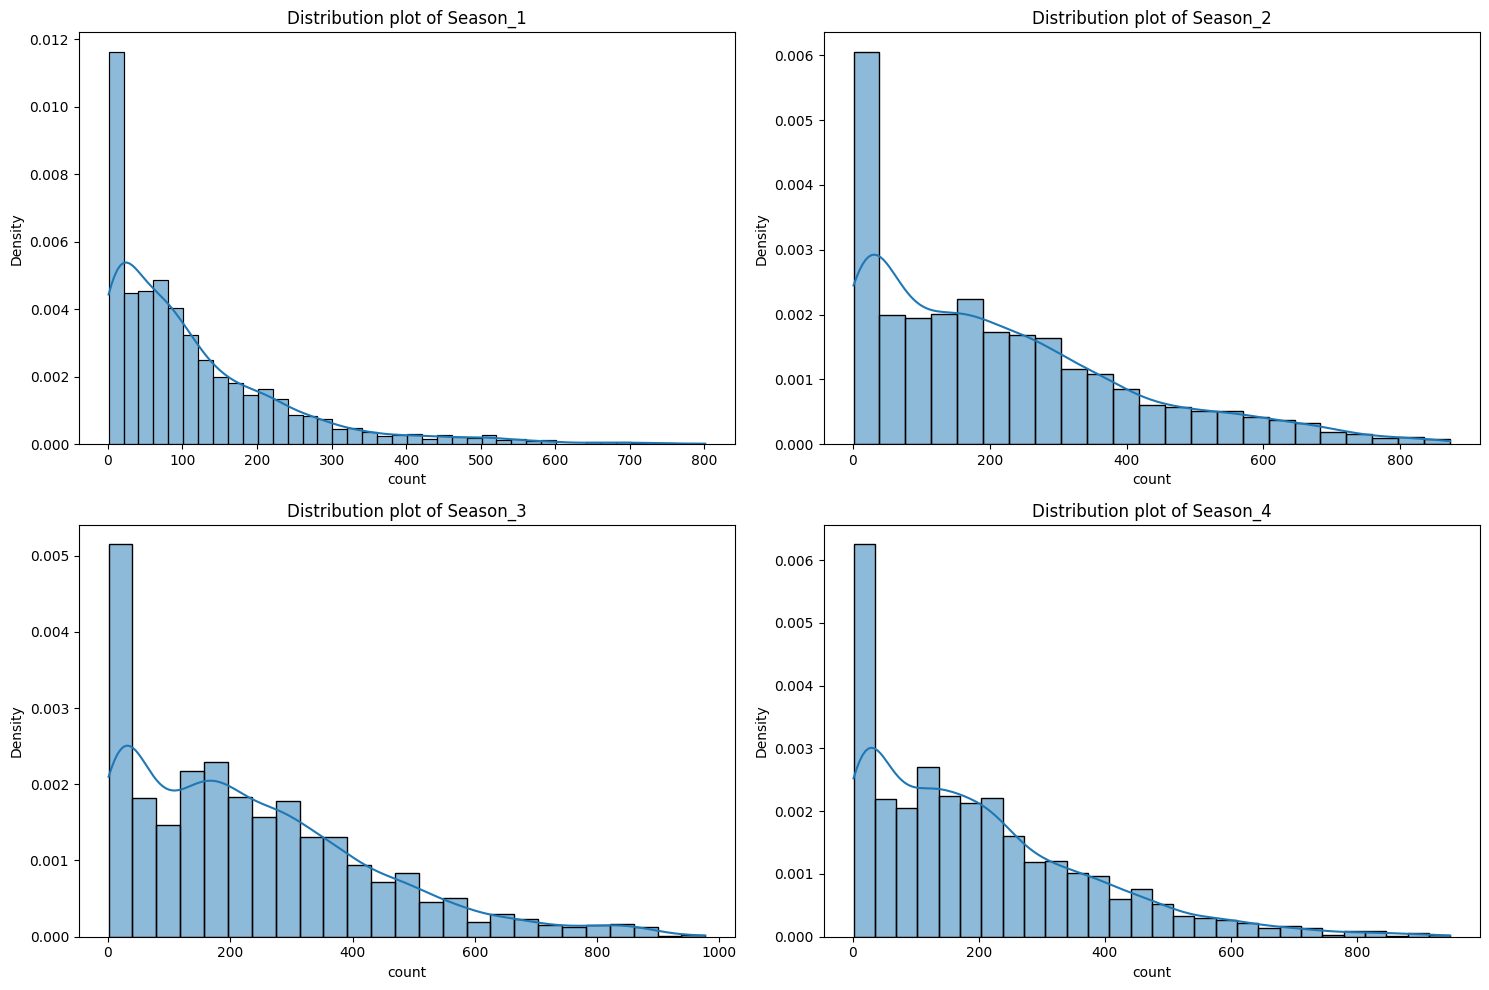

In [ ]:
#Now lets check for normality using histograms
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.histplot(season_1, stat='density', kde=True, ax=plt.gca())
plt.title('Distribution plot of Season_1')

plt.subplot(2,2,2)
sns.histplot(season_2, stat='density', kde=True,ax=plt.gca())
plt.title('Distribution plot of Season_2')

plt.subplot(2,2,3)
sns.histplot(season_3, stat='density', kde=True,ax=plt.gca())
plt.title('Distribution plot of Season_3')

plt.subplot(2,2,4)
sns.histplot(season_4, stat='density', kde=True,ax=plt.gca())
plt.title('Distribution plot of Season_4')

plt.tight_layout()
plt.show()

Histplots also confirms right skewness in all the seasons distributions.

In [ ]:
#checking skewness
print(f'Skewness in bike rides count in season 1 is: {season_1.skew()}')
print(f'Skewness in bike rides count in season 2 is: {season_2.skew()}')
print(f'Skewness in bike rides count in season 3 is: {season_3.skew()}')
print(f'Skewness in bike rides count in season 4 is: {season_4.skew()}')

Skewness in bike rides count in season 1 is: 1.8882622659759074
Skewness in bike rides count in season 2 is: 1.0032642267278118
Skewness in bike rides count in season 3 is: 0.9914946474772749
Skewness in bike rides count in season 4 is: 1.172117329762622


All categories positively(right) skewed.

In [ ]:
#checking kurtosis
print(f'Kurtosis in bike rides count in season 1 is: {season_1.kurt()}')
print(f'Kurtosis in bike rides count in season 2 is: {season_2.kurt()}')
print(f'Kurtosis in bike rides count in season 3 is: {season_3.kurt()}')
print(f'Kurtosis in bike rides count in season 4 is: {season_4.kurt()}')

Kurtosis in bike rides count in season 1 is: 4.313889255888712
Kurtosis in bike rides count in season 2 is: 0.42521337827415717
Kurtosis in bike rides count in season 3 is: 0.6993825795653992
Kurtosis in bike rides count in season 4 is: 1.2734853552995302


Season 1 distribution has positive kurtosis(leptokurtic) distribution and rest 3 are platykurtic distribution.

In [ ]:
#Shapiro wilk test to check for normality
#Since Shapiro Test is not efficient in such large sample size so we take out small sample size to run shapiro test
sample_size=200
print(f'Performing Shapiro test for all seasons for sample size({sample_size})')
stats_s1,p_s1=shapiro(season_1.sample(n=sample_size, random_state=42))
stats_s2,p_s2=shapiro(season_2.sample(n=sample_size, random_state=42))
stats_s3,p_s3=shapiro(season_3.sample(n=sample_size, random_state=42))
stats_s4,p_s4=shapiro(season_4.sample(n=sample_size, random_state=42))
print(f'p-value for season 1 in Shapiro wilk test is: {p_s1}')
print(f'p-value for season 2 in Shapiro wilk test is: {p_s2}')
print(f'p-value for season 3 in Shapiro wilk test is: {p_s3}')
print(f'p-value for season 4 in Shapiro wilk test is: {p_s4}')
alpha=0.05    #significance level
print('----Results of Shapiro wilk test----')
if p_s1<alpha:
  print('Distribution of season 1 significantly differ from normal distribution')
else:
  print('Distribution of season 1 likely follows normal distribution')

if p_s2<alpha:
  print('Distribution of season 2 significantly differ from normal distribution')
else:
  print('Distribution of season 2 likely follows normal distribution')

if p_s3<alpha:
  print('Distribution of season 3 significantly differ from normal distribution')
else:
  print('Distribution of season 3 likely follows normal distribution')

if p_s4<alpha:
  print('Distribution of season 4 significantly differ from normal distribution')
else:
  print('Distribution of season 4 likely follows normal distribution')

Performing Shapiro test for all seasons for sample size(200)
p-value for season 1 in Shapiro wilk test is: 5.804912114761001e-14
p-value for season 2 in Shapiro wilk test is: 1.6221958296559795e-10
p-value for season 3 in Shapiro wilk test is: 7.249354670587963e-09
p-value for season 4 in Shapiro wilk test is: 8.623405253273894e-11
----Results of Shapiro wilk test----
Distribution of season 1 significantly differ from normal distribution
Distribution of season 2 significantly differ from normal distribution
Distribution of season 3 significantly differ from normal distribution
Distribution of season 4 significantly differ from normal distribution


In [ ]:
#Levene Test to chcek for equality of variances
print(f'Performing Levene test for all seasons for sample size({sample_size})')
levene_stat_s,p_val_s=levene(season_1.sample(n=sample_size, random_state=42), season_2.sample(n=sample_size, random_state=42), season_3.sample(n=sample_size, random_state=42), season_4.sample(n=sample_size, random_state=42))
print(f'p-value for Levene test for different seasons is: {p_val_s}')
alpha=0.05     #significance level
print('----Results of Levene test----')
if p_val_s < alpha:
    print(f"Variances have significant difference among groups(p<{alpha})")
else:
    print(f'Variances are relatively equal among groups(p>{alpha})')

Performing Levene test for all seasons for sample size(200)
p-value for Levene test for different seasons is: 2.013822120036461e-09
----Results of Levene test----
Variances have significant difference among groups(p<0.05)


In [ ]:
#Assumptions of Anova test failed so we will use Kruskal test
#Hypothesis formulation
#H0(Null): All season groups have relatively equal median of bicycle ride count
#H1(Alternate): Atleast one season group has different median of bicycle ride count
kruskal_stats_s,p_value_k_s=kruskal(season_1,season_2,season_3,season_4)
print(f'p-value for Kruskal test for different seasons is: {p_value_k_s}')
alpha=0.05     #significance level
print('----Results of Kruskal test----')
if p_value_k_s < alpha:
  print(f'Since p-value < {alpha}, we reject the null hypothesis')
  print(f'Conclusion: Ride count of different seasons have significant difference')
else:
  print(f'Since p-value > {alpha}, we fail to reject the null hypothesis')
  print(f'Conclusion: There is no significant difference in ride count of different seasons')

p-value for Kruskal test for different seasons is: 2.2263612957303657e-151
----Results of Kruskal test----
Since p-value < 0.05, we reject the null hypothesis
Conclusion: Ride count of different seasons have significant difference


In [ ]:
#There is significant difference in medians of ride counts of all seasons

## **Inferences & Conclusions (Season Condition Hypothesis Test)**:

*   **Hypothesis**: We tested whether the demand for bicycles on rent is the same for different seasons (H0: Medians are equal; H1: At least one median is different).
*   **Test Used**: A Kruskal-Wallis H-test was performed. This non-parametric test was chosen because the assumptions for ANOVA (normality and homogeneity of variances) were significantly violated, as evidenced by:
    *   **Histograms and QQ Plots**: Showed strong positive skewness and heavy tails for bike counts in all seasons.
    *   **Shapiro-Wilk Test**: Indicated statistically significant non-normality (very small p-values) even on smaller samples for all seasons.
    *   **Levene's Test**: Indicated statistically significant unequal variances across the season groups.
*   **Result**: The Kruskal-Wallis H-test yielded an extremely small p-value of `2.226e-151`.
*   **Decision**: Since the p-value (`2.226e-151`) is much less than our chosen significance level (alpha = 0.05), we **reject the null hypothesis**.
*   **Conclusion**: There is **a statistically significant difference** in the median number of bike rides across different seasons. This means that the season indeed has a significant impact on the demand for bike rentals.
*   **Visual Confirmation**: The boxplot comparing bike counts across seasons visually supported this finding, showing clear differences in medians and distributions, particularly higher demand in warmer seasons.

## **Recommendations (Season Conditions)**:

1.  **Seasonal Inventory Adjustment**: Anticipate higher bike demand during peak seasons (likely summer and autumn, based on typical patterns and observed distributions) and adjust bike fleet availability accordingly.
2.  **Marketing and Promotions**: Tailor marketing campaigns and promotions to align with seasonal demand patterns. For instance, promoting leisure rides during warmer months and perhaps offering incentives during colder seasons.
3.  **Maintenance Scheduling**: Schedule major bike maintenance and repairs during off-peak seasons (e.g., winter or early spring) to minimize service disruptions during high-demand periods.
4.  **Staffing Optimization**: Adjust staffing levels for bike distribution, customer service, and maintenance to match the fluctuating demand across seasons.


**Question 6.** Check if the Weather conditions are significantly different during different Seasons?

**Solution:**

**Hypothesis formulation:**

**H0(Null):** Weather and season are independent

**H1(Alternate):** Weather and season are dependent

Since we have to compare two categories, we will use Chi-square test for independence. It has no assumption of normality and equal variance.

In [ ]:
vals=pd.crosstab(data['season'],data['weather'])
vals

weather,1,2,3
season,,,
1,1759,715,211
2,1801,708,224
3,1930,604,199
4,1702,807,225


There are different weather frequencies in different seasons

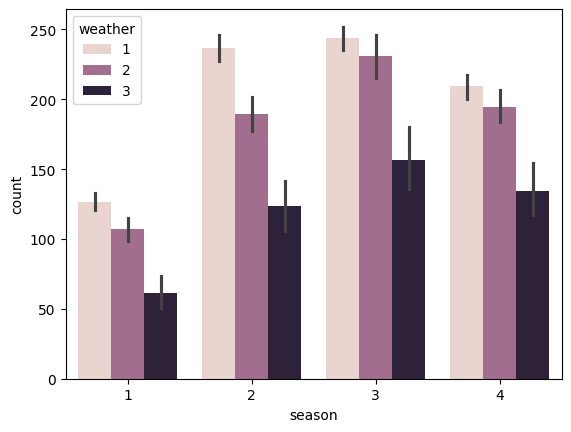

In [ ]:
sns.barplot(x=data['season'],y=data['count'],hue=data['weather'])
plt.show()

It infers that bike ride counts in each weather differs in each season so they can't be independent.

In [ ]:
#Performing Chi Square test
print('----Chi-Square Test----')
ch_stats, p_chi, df, exp_fre=chi2_contingency(vals)
print(f'p-value for chi-square contingency test of season and weather is:{p_chi}')
alpha=0.05    #significance level
if p_chi<alpha:
  print(f'Since p-value < {alpha}, we reject the null hypothesis')
  print(f'Conclusion: Weather and season are not independent')
else:
  print(f'Since p-value > {alpha}, we fail to reject the null hypothesis')
  print(f'Conclusion: Weather and season are independent')

----Chi-Square Test----
p-value for chi-square contingency test of season and weather is:2.8260014509929343e-08
Since p-value < 0.05, we reject the null hypothesis
Conclusion: Weather and season are not independent


## **Inferences & Conclusions (Weather and Season Dependency Test)**:

*   **Hypothesis**: We tested whether weather conditions and seasons are independent (H0: Weather and Season are independent; H1: Weather and Season are dependent).
*   **Test Used**: A Chi-square test of independence was performed. This test is appropriate for examining the association between two categorical variables ('season' and 'weather').
*   **Result**: The Chi-square test yielded an extremely small p-value of 2.826e-08.
*   **Decision**: Since the p-value (2.826e-08) is much less than our chosen significance level (alpha = 0.05), we **reject the null hypothesis**.
*   **Conclusion**: There is **a statistically significant dependency** between weather conditions and seasons. This means that the distribution of weather conditions is not the same across different seasons; certain weather types are more prevalent or impactful during specific seasons.
*   **Visual Confirmation**: The barplot showing bike 'count' by 'season' and 'weather' visually supported this, as the patterns of bike demand varied significantly across seasons. The contingency table also showed differing frequencies of weather types in each season.

## **Recommendations (Weather and Season Dependency)**:

1.  **Integrated Planning**: Operational and strategic planning for bike rentals should not consider weather and season in isolation. Instead, adopt an integrated approach that accounts for the typical weather patterns within each season.
2.  **Granular Forecasting**: Develop demand forecasting models that incorporate both seasonal and weather-specific factors. For example, predicting demand for 'clear weather in summer' will be more accurate than predicting for 'clear weather' or 'summer' alone.
3.  **Targeted Marketing**: Tailor marketing campaigns and promotions to specific season-weather combinations, understanding that user behavior is influenced by both.

# **Overall Insights**

### 1. Basic EDA:
*   **Dataset Dimensions**: The dataset contains 10886 rows and 12 columns, with each entry in 'datetime' being unique, suggesting hourly granularity.
*   **Missing Values & Duplicates**: No missing values or duplicate rows were found, indicating a clean dataset.
*   **Data Types**: 'datetime' was an object type, and 'season', 'holiday', 'workingday', 'weather' were identified as categorical despite being integers. 'count', 'casual', and 'registered' showed significant variability.
*   **Multicollinearity**: 'temp' and 'atemp' were almost perfectly correlated (0.99), leading to the removal of 'atemp'. 'casual' and 'registered' were also highly correlated with 'count', as 'count' is their sum. These were removed to avoid multicollinearity and direct dependence in predictive modeling.

### 2. Univariate Analysis:
*   **Categorical Variables**:
    *   **Season**: Bike rentals are relatively balanced across all four seasons.
    *   **Holiday**: Most data points are from non-holidays, with holidays being rare events.
    *   **Workingday**: The dataset contains significantly more working days than non-working days.
    *   **Weather**: Clear weather (condition 1) dominates the observations, followed by mist/cloudy (condition 2) and light rain/snow (condition 3). Extreme weather (condition 4) was a rare outlier and removed.
*   **Numerical Variables**:
    *   **Temperature (temp)**: Shows a multimodal distribution, suggesting varying optimal temperatures for riding throughout the year.
    *   **Humidity**: Slightly left-skewed, with a concentration of moderate to high values.
    *   **Windspeed**: Highly right-skewed, indicating most rentals occur during low wind conditions.
    *   **Rental Counts (casual, registered, count)**: All are strongly right-skewed, meaning lower rental numbers are most common, with fewer instances of very high demand.

### 3. Outlier Treatment:
*   Initial outlier detection using IQR showed significant outliers in numerical columns. Removing these outliers led to a **12.57% data loss**, which was deemed too high. Therefore, the original dataset was retained, with a plan to use non-parametric tests or robust statistical methods for hypothesis testing.

### 4. Correlation Analysis:
*   **'count' with Temperature**: A strong positive correlation (0.39-0.40) exists between 'temp' and 'count', indicating higher demand in warmer conditions.
*   **'count' with Humidity**: A negative correlation (-0.32) suggests that higher humidity leads to fewer bike rentals.
*   **'count' with Windspeed**: A very weak negative correlation (-0.02), implying minimal linear impact of windspeed on demand.

### 5. Hypothesis Tests:

1.  **Working Day vs. Weekend Demand (Hypothesis 1)**:
    *   **Finding**: There is **no statistically significant difference** in the *average hourly log-transformed number of bike rides between weekdays and weekends*.
    *   **Implication**: Simply categorizing a day as a 'working day' versus a 'non-working day' does not, on its own, predict a significant difference in overall hourly bike demand. Other factors (like time of day or specific events) might be more influential.

2.  **Weather Conditions and Demand (Hypothesis 2)**:
    *   **Finding**: There is **a statistically significant difference** in the median number of bike rides across different weather conditions.
    *   **Implication**: Weather conditions have a crucial impact on bike rental demand. Clear weather drives significantly higher demand than mist/cloudy or light rain/snow conditions.

3.  **Season and Demand (Hypothesis 3)**:
    *   **Finding**: There is **a statistically significant difference** in the median number of bike rides across different seasons.
    *   **Implication**: Seasonal changes profoundly influence bike rental demand, with certain seasons being more popular for rentals than others.

4.  **Weather-Season Dependency (Hypothesis 4)**:
    *   **Finding**: There is **a statistically significant dependency** between weather conditions and seasons.
    *   **Implication**: Weather patterns are not uniform throughout the year; specific weather conditions are more likely to occur during certain seasons. This interaction must be considered for accurate demand prediction.



# **Overall Recommendations:**

### Strategic Recommendations:

1.  **Integrated Demand Forecasting**: Develop and implement a robust demand forecasting model that integrates key influencing factors, particularly season, weather conditions, and temperature. Since weather and season are dependent, models should account for this interaction.
2.  **Dynamic Pricing & Promotions**:
    *   During **peak seasons/favorable weather**: Consider surge pricing or premium offerings to maximize revenue when demand is naturally high.
    *   During **off-peak seasons/adverse weather**: Implement targeted promotions, discounts, or loyalty programs to stimulate demand and maintain usage.
3.  **Resource Optimization**:
    *   **Fleet Management**: Adjust the size and distribution of the bike fleet dynamically based on seasonal forecasts and real-time weather conditions. More bikes should be available in high-demand areas during favorable periods.
    *   **Maintenance & Staffing**: Schedule bike maintenance and staff deployments (e.g., rebalancing bikes, customer support) to align with predicted demand peaks and troughs. Off-peak seasons are ideal for major overhauls.


### Operational Recommendations:

1.  **Focus on Weather-Driven Operations**: Given the strong impact of weather, operational decisions (e.g., bike availability, staff deployment) should be highly responsive to immediate and forecasted weather conditions.
2.  **Season-Specific Service Adaptations**:
    *   **Warmer Seasons (Spring/Summer/Autumn)**: Emphasize leisure riding, tourist engagement, and longer rental durations.
    *   **Colder Seasons (Winter)**: Focus on essential commuting routes, potentially offering incentives for continued usage, or diversifying services.
3.  **Explore Time-of-Day Patterns**: While 'workingday' alone doesn't differentiate total hourly demand, demand *patterns* within those hours likely differ. Further analysis on hourly demand during weekdays vs. weekends could reveal specific commuting peaks (weekdays) or leisure peaks (weekends) that require different operational responses (e.g., bike distribution at specific hours).


### Further Analysis Considerations:

1.  **Feature Engineering**: Extract temporal features from the 'datetime' column (e.g., hour of day, day of week, month, year) to capture more granular patterns and trends.
2.  **Impact of Holidays**: Investigate the specific impact of different types of holidays (e.g., national holidays vs. local events) if more granular data is available.
4.  **Geospatial Analysis**: If location data were available, analyze geographical demand patterns to optimize bike station placement and redistribution.

By implementing these recommendations, Yulu can better anticipate demand fluctuations, optimize resource allocation, and enhance customer satisfaction, ultimately leading to improved operational efficiency and profitability.